In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Load the dataset
# eda_data_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/eda_data.csv')
# glassdoor_jobs_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/glassdoor_jobs.csv')
# salary_data_cleaned_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/salary_data_cleaned.csv')

salary_data_cleaned_df = pd.read_csv('salary_data_cleaned.csv')

# I use eda_data_df in the following exploration. Maybe we can decide which df to use?

# Linear Regression 

In [ ]:
salary = salary_data_cleaned_df

In [ ]:
job_description = salary[['Job Description', 'avg_salary']]
job_description

,Job Description,avg_salary
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",72.0
1,What You Will Do:\n\nI. General Summary\n\nThe...,87.5
2,"KnowBe4, Inc. is a high growth information sec...",85.0
3,*Organization and Job ID**\nJob ID: 310709\n\n...,76.5
4,Data Scientist\nAffinity Solutions / Marketing...,114.5
...,...,...
737,Site Name: USA - Massachusetts - Cambridge\nPo...,84.5
738,THE CHALLENGE\nEventbrite has a world-class da...,102.5
739,The Auton Lab at Carnegie Mellon University is...,73.5
740,Data Science ManagerResponsibilities:\n\nOvers...,127.5


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk, re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

stemmer = PorterStemmer()
words = stopwords.words("english")
#job_description['cleaned']
salary['cleaned'] = job_description['Job Description']\
.apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
job_description

,Job Description,avg_salary
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",72.0
1,What You Will Do:\n\nI. General Summary\n\nThe...,87.5
2,"KnowBe4, Inc. is a high growth information sec...",85.0
3,*Organization and Job ID**\nJob ID: 310709\n\n...,76.5
4,Data Scientist\nAffinity Solutions / Marketing...,114.5
...,...,...
737,Site Name: USA - Massachusetts - Cambridge\nPo...,84.5
738,THE CHALLENGE\nEventbrite has a world-class da...,102.5
739,The Auton Lab at Carnegie Mellon University is...,73.5
740,Data Science ManagerResponsibilities:\n\nOvers...,127.5


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(salary['cleaned']).toarray()
final_features.shape

(742, 28688)

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [ ]:
salary[['cleaned', 'age','Rating','Size','job_state','Headquarters','Location']]

,cleaned,age,Rating,Size,job_state,Headquarters,Location
0,data scientist locat albuquerqu nm educ requir...,47,3.8,501 to 1000 employees,NM,"Goleta, CA","Albuquerque, NM"
1,what you will do i gener summari the healthcar...,36,3.4,10000+ employees,MD,"Baltimore, MD","Linthicum, MD"
2,knowb inc high growth inform secur compani we ...,10,4.8,501 to 1000 employees,FL,"Clearwater, FL","Clearwater, FL"
3,organ job id job id director earth biolog scie...,55,3.8,1001 to 5000 employees,WA,"Richland, WA","Richland, WA"
4,data scientist affin solut market cloud seek s...,22,2.9,51 to 200 employees,NY,"New York, NY","New York, NY"
...,...,...,...,...,...,...,...
737,site name usa massachusett cambridg post date ...,190,3.9,10000+ employees,MA,"Brentford, United Kingdom","Cambridge, MA"
738,the challeng eventbrit world class data reposi...,14,4.4,1001 to 5000 employees,TN,"San Francisco, CA","Nashville, TN"
739,the auton lab carnegi mellon univers larg acad...,36,2.6,501 to 1000 employees,PA,"Pittsburgh, PA","Pittsburgh, PA"
740,data scienc managerrespons overse team data sc...,-1,3.2,1 to 50 employees,PA,"Chadds Ford, PA","Allentown, PA"


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [ ]:
# Separate the features and the target variable
X = salary[['cleaned', 'age','Rating','Size','job_state','Headquarters','Location']]
# X = salary[['age','Rating','Size','job_state','Headquarters','Location', 'Type of ownership', 'Sector', 'Revenue']]
y = salary['avg_salary']

# Define the categorical columns that need to be one-hot encoded
cat_cols = ['cleaned', 'job_state','Headquarters','Location','Size']
# target_encoding_cols = ['job_state','Headquarters','Location', 'Type of ownership', 'Sector', 'Size', 'Revenue']

In [ ]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

# te = TargetEncoder()
# X[target_encoding_cols] = te.fit_transform(X[target_encoding_cols], y)

In [ ]:
# combined_df = X
# combined_df

In [ ]:
import category_encoders as ce

In [ ]:
cat_cols = ['cleaned', 'job_state','Headquarters','Location','Size']
te = ce.TargetEncoder (cols = cat_cols )

In [ ]:
te.fit(X , y)
df_encoded = te.transform(X )

In [ ]:
df_encoded

,cleaned,age,Rating,Size,job_state,Headquarters,Location
0,96.901524,47,3.8,90.753842,96.564705,96.901524,96.564705
1,98.918206,36,3.4,112.230575,97.953468,97.782204,98.918206
2,98.409445,10,4.8,90.753842,91.395421,95.985349,95.985349
3,97.203710,55,3.8,92.916684,96.722510,95.381099,94.177868
4,102.431134,22,2.9,111.344512,98.663604,100.403309,103.062780
...,...,...,...,...,...,...,...
737,98.338519,190,3.9,112.230575,106.280148,98.421082,108.183579
738,100.891838,14,4.4,92.916684,96.143020,123.243870,93.944492
739,96.435984,36,2.6,90.753842,94.287934,102.757466,102.653781
740,104.438115,-1,3.2,101.886778,94.287934,104.545779,104.438115


In [ ]:
combined_df = df_encoded
combined_df

,cleaned,age,Rating,Size,job_state,Headquarters,Location
0,96.901524,47,3.8,90.753842,96.564705,96.901524,96.564705
1,98.918206,36,3.4,112.230575,97.953468,97.782204,98.918206
2,98.409445,10,4.8,90.753842,91.395421,95.985349,95.985349
3,97.203710,55,3.8,92.916684,96.722510,95.381099,94.177868
4,102.431134,22,2.9,111.344512,98.663604,100.403309,103.062780
...,...,...,...,...,...,...,...
737,98.338519,190,3.9,112.230575,106.280148,98.421082,108.183579
738,100.891838,14,4.4,92.916684,96.143020,123.243870,93.944492
739,96.435984,36,2.6,90.753842,94.287934,102.757466,102.653781
740,104.438115,-1,3.2,101.886778,94.287934,104.545779,104.438115


In [ ]:
num_cols = ['age', 'Rating']
salary[num_cols]

,age,Rating
0,47,3.8
1,36,3.4
2,10,4.8
3,55,3.8
4,22,2.9
...,...,...
737,190,3.9
738,14,4.4
739,36,2.6
740,-1,3.2


In [ ]:
# import pandas as pd

# # Assuming both dataframes have the same number of rows
# combined_df = pd.concat([salary[num_cols], df_encoded], axis=1)

In [ ]:
# combined_df

In [ ]:
X = combined_df
y = salary['avg_salary']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Create a linear regression object
regressor = LinearRegression()

# Define the hyperparameters to search through
hyperparameters = {'fit_intercept': [True, False]}

# Create a grid search object with the defined hyperparameters
grid_search = GridSearchCV(regressor, hyperparameters, cv=5)
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(grid_search.best_params_)

# Use the best hyperparameters to create a new model
best_regressor = LinearRegression(fit_intercept=True)

# Train the new model on the training data
best_regressor.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_regressor.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
# Predict the output values for new input data using the best model
y_test_pred = best_regressor.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
print("R2: {:.2f}".format(r2_score(y_test, y_test_pred)))

linear_reg_mse = mean_squared_error(y_test, y_test_pred)
linear_reg_r2 = r2_score(y_test, y_test_pred)

{'fit_intercept': True}
MSE: 9.41
R2: 0.99


# RandomForestRegressor

In [ ]:
X = combined_df
y = salary['avg_salary']

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the random forest model
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create a grid search object
rf_gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error")

# Fit the grid search object on the training data
rf_gs.fit(X_train, y_train)

# Use the best estimator from the grid search to make predictions on the testing data
y_pred = rf_gs.best_estimator_.predict(X_test)

# Calculate the MSE and R2 of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

MSE: 4.67
R2: 1.00


In [ ]:
rf_model = rf_gs.best_estimator_

In [ ]:
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 'cleaned': 0.9943394548491126
2. feature 'Location': 0.0013195144206975553
3. feature 'Headquarters': 0.0012514124293477999
4. feature 'age': 0.0010269558866683375
5. feature 'job_state': 0.0008485722674889222
6. feature 'Rating': 0.0008156146538402777
7. feature 'Size': 0.00039847549284455593


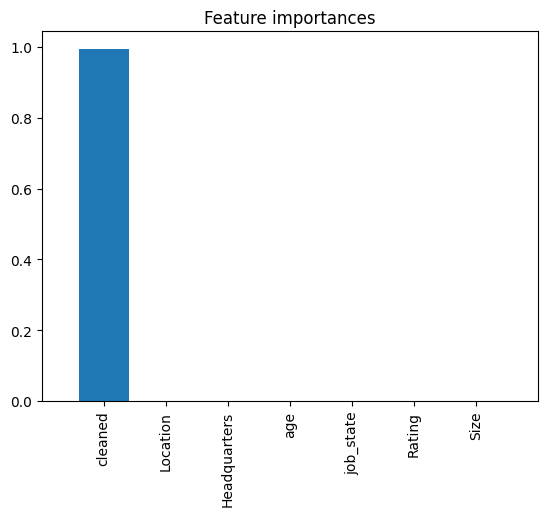

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns.values

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. feature '{feature_names[indices[f]]}': {importances[indices[f]]}")

# Plot the feature importances as a bar chart
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#Bayesian Linear Regression

In [ ]:
X = combined_df
y = salary['avg_salary'] 

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Define the parameter grid for the grid search
param_grid = {'n_iter': [100, 500, 1000],
              'alpha_1': [1e-6, 1e-5, 1e-4],
              'alpha_2': [1e-6, 1e-5, 1e-4],
              'lambda_1': [1e-6, 1e-5, 1e-4],
              'lambda_2': [1e-6, 1e-5, 1e-4]}

# Fit a Bayesian Linear Regression model
bayes_linear_reg = BayesianRidge()
grid_search = GridSearchCV(bayes_linear_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator and score
best_bayes_linear_reg = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Score of best estimator: ", best_score)

# # Evaluate the model on the validation set
# bayes_linear_reg_score = bayes_linear_reg.score(X_val, y_val)

# # Predict the output values for new input data
# bayes_linear_reg_predicted_output = bayes_linear_reg.predict(X_test)

# print(bayes_linear_reg_score)

# Evaluate the model on the validation set
y_val_pred = best_bayes_linear_reg.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Validation MSE: {:.2f}".format(mse))
print("Validation R2: {:.2f}".format(r2))

# Predict the output values for new input data
y_test_pred = best_bayes_linear_reg.predict(X_test)

print("Test MSE: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
print("Test R2: {:.2f}".format(r2_score(y_test, y_test_pred)))

bayes_linear_reg_mse = mean_squared_error(y_test, y_test_pred)
bayes_linear_reg_r2 = r2_score(y_test, y_test_pred)

Score of best estimator:  -13.40838703880305
Validation MSE: 7.29
Validation R2: 1.00
Test MSE: 9.41
Test R2: 0.99


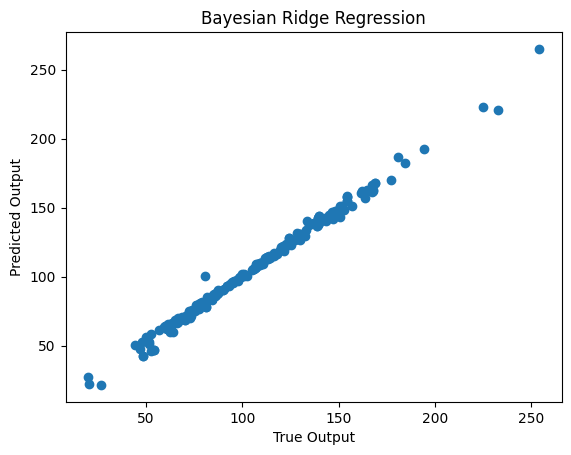

In [ ]:
# Scatter plot of predicted vs true output values
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('Bayesian Ridge Regression')
plt.show()

#Polynomial Regression

In [ ]:
X = combined_df
y = salary['avg_salary']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline for polynomial regression
poly = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# hyperparameters for the grid search
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'lin_reg__fit_intercept': [True, False]
}

# grid search
grid_search = GridSearchCV(poly, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# best model from the grid search
best_model = grid_search.best_estimator_

# evaluate the model
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

poly_reg_mse = mean_squared_error(y_val, y_pred)
poly_reg_r2 = r2_score(y_val, y_pred)

MSE: 8.53
R2: 0.99


#Result

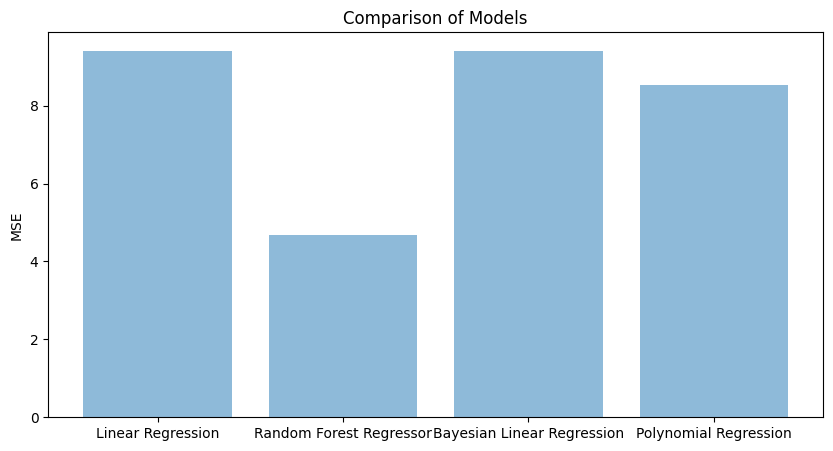

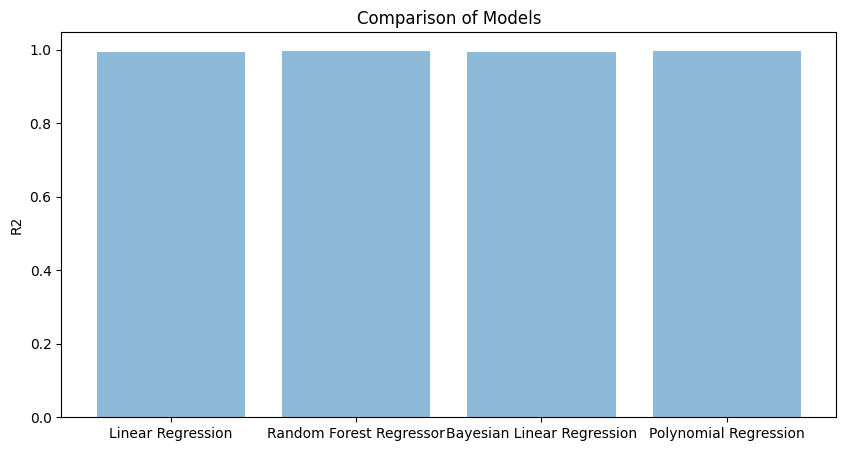

In [ ]:
# Bar plot of MSE and R2 values
mse_vals = [linear_reg_mse, rf_mse, bayes_linear_reg_mse, poly_reg_mse] # Replace with your MSE values
r2_vals = [linear_reg_r2, rf_r2, bayes_linear_reg_r2, poly_reg_r2] # Replace with your R2 values
model_names = ['Linear Regression', 'Random Forest Regressor', 'Bayesian Linear Regression', 'Polynomial Regression'] # Replace with your model names
x_pos = np.arange(len(model_names))

plt.figure(figsize=(10, 5))
plt.bar(x_pos, mse_vals, align='center', alpha=0.5)
plt.xticks(x_pos, model_names)
plt.ylabel('MSE')
plt.title('Comparison of Models')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(x_pos, r2_vals, align='center', alpha=0.5)
plt.xticks(x_pos, model_names)
plt.ylabel('R2')
plt.title('Comparison of Models')
plt.show()

# Vedangi --> experiments

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline for polynomial regression
poly = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# hyperparameters for the grid search
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'lin_reg__fit_intercept': [True, False]
}

# grid search
grid_search = GridSearchCV(poly, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# best model from the grid search
best_model = grid_search.best_estimator_

# evaluate the model
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

poly_reg_mse = mean_squared_error(y_val, y_pred)
poly_reg_r2 = r2_score(y_val, y_pred)

MSE: 8.53
R2: 0.99


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import csv

In [ ]:
df = pd.read_csv('salary_data_cleaned.csv')

In [ ]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [ ]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64